## Assignment is below at the bottom

Video 13.1
https://www.youtube.com/watch?v=kIGHE7Cfe1s

Video 13.2
https://www.youtube.com/watch?v=Rm9bJcDd1KU

Video 13.3
https://youtu.be/6HjZk-3LsjE

In [198]:
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))

In [176]:

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [177]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')

In [178]:
autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest))

                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')]

Epoch 1/100
235/235 [==============================] - 3s 12ms/step - loss: 0.2220 - val_loss: 0.1457
Epoch 2/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1318 - val_loss: 0.1190
Epoch 3/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1143 - val_loss: 0.1081
Epoch 4/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1061 - val_loss: 0.1023
Epoch 5/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1009 - val_loss: 0.0981
Epoch 6/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0977 - val_loss: 0.0955
Epoch 7/100
235/235 [==============================] - 3s 12ms/step - loss: 0.0954 - val_loss: 0.0933
Epoch 8/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0933 - val_loss: 0.0918
Epoch 9/100
235/235 [==============================] - 3s 12ms/step - loss: 0.0919 - val_loss: 0.0908
Epoch 10/100
235/235 [==============================] - 3s 11ms/step - loss: 0.090

235/235 [==============================] - 3s 11ms/step - loss: 0.0776 - val_loss: 0.0783
Epoch 81/100
235/235 [==============================] - 3s 12ms/step - loss: 0.0776 - val_loss: 0.0782
Epoch 82/100
235/235 [==============================] - 3s 12ms/step - loss: 0.0776 - val_loss: 0.0782
Epoch 83/100
235/235 [==============================] - 2s 11ms/step - loss: 0.0775 - val_loss: 0.0782
Epoch 84/100
235/235 [==============================] - 2s 11ms/step - loss: 0.0775 - val_loss: 0.0783
Epoch 85/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0775 - val_loss: 0.0778
Epoch 86/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0775 - val_loss: 0.0780
Epoch 87/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0775 - val_loss: 0.0780
Epoch 88/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0774 - val_loss: 0.0779
Epoch 89/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0774 - 

313/313 [==============================] - 1s 2ms/step


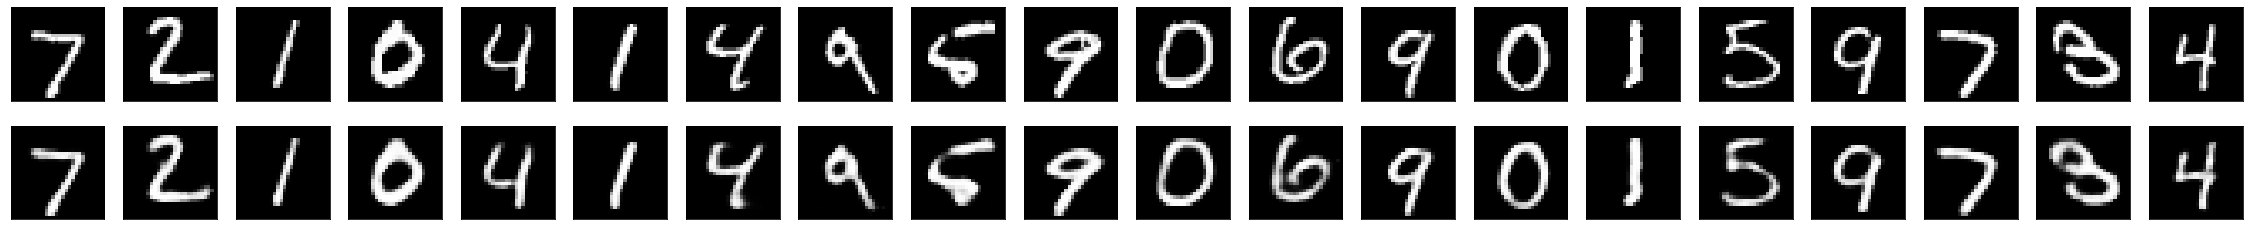

In [179]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [164]:
encoded_imgs

array([[ 5.356692 ,  0.       ,  6.9508295, ..., 11.840502 , 12.25948  ,
         4.866359 ],
       [ 9.853178 ,  0.       , 10.504403 , ...,  8.588361 ,  6.4060116,
         8.037114 ],
       [11.018021 ,  0.       ,  2.1283062, ...,  5.431032 ,  2.2813501,
        10.547971 ],
       ...,
       [ 7.181688 ,  0.       ,  5.6832786, ...,  9.81072  , 10.804146 ,
         7.2720375],
       [ 8.877912 ,  0.       ,  4.2062726, ...,  4.5439916, 13.316283 ,
         9.644587 ],
       [11.545435 ,  0.       ,  5.193022 , ...,  3.543675 , 12.108746 ,
         7.2934074]], dtype=float32)

In [166]:
np.max(encoded_imgs)

24.936653

In [167]:
%matplotlib inline

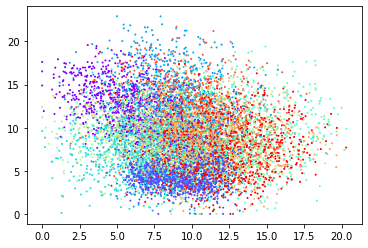

In [180]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,0], s=1, c=ytest, cmap='rainbow')
#plt.show()

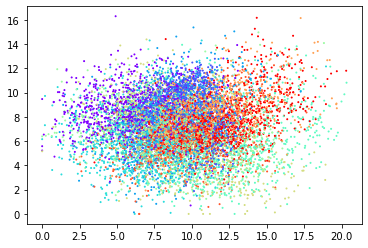

In [181]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')
# plt.show()

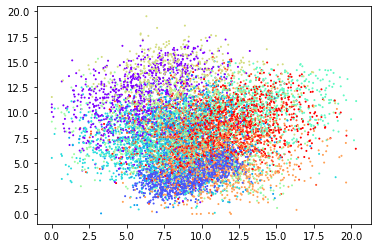

In [182]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,2], s=1, c=ytest, cmap='rainbow')
# plt.show()

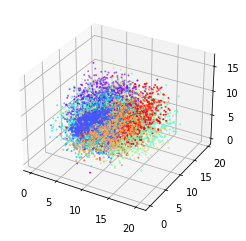

In [183]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encoded_imgs[:,1], encoded_imgs[:,2], encoded_imgs[:,3], c=ytest, cmap='rainbow', s=1)

In [113]:
noise = np.random.normal(20,4, (4,4))

noise_preds = decoder.predict(noise)

InvalidArgumentError: Graph execution error:

Detected at node 'model_98/dense_195/Relu' defined at (most recent call last):
    File "/Users/cody/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/cody/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/cody/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/Users/cody/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/Users/cody/opt/anaconda3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell
      await result
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/gf/3459_gl932ldjkknblzk6jfr0000gn/T/ipykernel_1293/1538529831.py", line 3, in <cell line: 3>
      noise_preds = decoder.predict(noise)
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1983, in predict_step
      return self(x, training=False)
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/keras/engine/functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/keras/engine/functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/keras/layers/core/dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/keras/activations.py", line 317, in relu
      return backend.relu(
    File "/Users/cody/opt/anaconda3/lib/python3.9/site-packages/keras/backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'model_98/dense_195/Relu'
Matrix size-incompatible: In[0]: [4,4], In[1]: [32,128]
	 [[{{node model_98/dense_195/Relu}}]] [Op:__inference_predict_function_1400855]

In [114]:
plt.imshow(noise_preds[1].reshape(28,28))

ValueError: cannot reshape array of size 8 into shape (28,28)

# Assignment


1. change the `encoding_dim` through various values (`range(2,18,2)` and store or keep track of the best loss you can get. Plot the 8 pairs of dimensions vs loss on a scatter plot


Epoch 1/100
235/235 [==============================] - 3s 13ms/step - loss: 0.2669 - val_loss: 0.2282
Epoch 2/100
235/235 [==============================] - 3s 14ms/step - loss: 0.2166 - val_loss: 0.2081
Epoch 3/100
235/235 [==============================] - 3s 12ms/step - loss: 0.2042 - val_loss: 0.2012
Epoch 4/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1982 - val_loss: 0.1951
Epoch 5/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1929 - val_loss: 0.1906
Epoch 6/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1892 - val_loss: 0.1878
Epoch 7/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1867 - val_loss: 0.1860
Epoch 8/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1849 - val_loss: 0.1844
Epoch 9/100
235/235 [==============================] - 2s 11ms/step - loss: 0.1834 - val_loss: 0.1833
Epoch 10/100
235/235 [==============================] - 3s 11ms/step - loss: 0.182

235/235 [==============================] - 3s 11ms/step - loss: 0.1643 - val_loss: 0.1708
Epoch 81/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1644 - val_loss: 0.1705
Epoch 82/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1643 - val_loss: 0.1711
Epoch 83/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1641 - val_loss: 0.1706
Epoch 84/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1640 - val_loss: 0.1707
Epoch 85/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1642 - val_loss: 0.1706
Epoch 86/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1640 - val_loss: 0.1703
Epoch 87/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1638 - val_loss: 0.1702
Epoch 88/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1638 - val_loss: 0.1707
Epoch 89/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1640 - 

235/235 [==============================] - 3s 12ms/step - loss: 0.1502 - val_loss: 0.1562
Epoch 60/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1501 - val_loss: 0.1559
Epoch 61/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1499 - val_loss: 0.1560
Epoch 62/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1499 - val_loss: 0.1557
Epoch 63/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1498 - val_loss: 0.1560
Epoch 64/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1497 - val_loss: 0.1558
Epoch 65/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1496 - val_loss: 0.1557
Epoch 66/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1494 - val_loss: 0.1557
Epoch 67/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1495 - val_loss: 0.1558
Epoch 68/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1493 - 

235/235 [==============================] - 3s 12ms/step - loss: 0.1215 - val_loss: 0.1239
Epoch 39/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1212 - val_loss: 0.1236
Epoch 40/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1210 - val_loss: 0.1237
Epoch 41/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1208 - val_loss: 0.1233
Epoch 42/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1207 - val_loss: 0.1234
Epoch 43/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1205 - val_loss: 0.1235
Epoch 44/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1204 - val_loss: 0.1234
Epoch 45/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1202 - val_loss: 0.1230
Epoch 46/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1200 - val_loss: 0.1230
Epoch 47/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1199 - 

235/235 [==============================] - 3s 13ms/step - loss: 0.1166 - val_loss: 0.1163
Epoch 18/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1161 - val_loss: 0.1160
Epoch 19/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1156 - val_loss: 0.1155
Epoch 20/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1152 - val_loss: 0.1152
Epoch 21/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1149 - val_loss: 0.1147
Epoch 22/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1145 - val_loss: 0.1144
Epoch 23/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1141 - val_loss: 0.1145
Epoch 24/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1138 - val_loss: 0.1142
Epoch 25/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1134 - val_loss: 0.1138
Epoch 26/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1133 - 

235/235 [==============================] - 4s 16ms/step - loss: 0.1053 - val_loss: 0.1087
Epoch 97/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1053 - val_loss: 0.1090
Epoch 98/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1052 - val_loss: 0.1091
Epoch 99/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1052 - val_loss: 0.1088
Epoch 100/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1052 - val_loss: 0.1088
Epoch 1/100
235/235 [==============================] - 4s 13ms/step - loss: 0.2372 - val_loss: 0.1615
Epoch 2/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1487 - val_loss: 0.1396
Epoch 3/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1374 - val_loss: 0.1331
Epoch 4/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1323 - val_loss: 0.1296
Epoch 5/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1289 - val_

235/235 [==============================] - 3s 13ms/step - loss: 0.1057 - val_loss: 0.1088
Epoch 76/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1057 - val_loss: 0.1089
Epoch 77/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1056 - val_loss: 0.1091
Epoch 78/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1056 - val_loss: 0.1087
Epoch 79/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1055 - val_loss: 0.1087
Epoch 80/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1055 - val_loss: 0.1089
Epoch 81/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1053 - val_loss: 0.1088
Epoch 82/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1053 - val_loss: 0.1089
Epoch 83/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1053 - val_loss: 0.1086
Epoch 84/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1052 - 

235/235 [==============================] - 3s 14ms/step - loss: 0.0969 - val_loss: 0.0987
Epoch 55/100
235/235 [==============================] - 3s 14ms/step - loss: 0.0968 - val_loss: 0.0984
Epoch 56/100
235/235 [==============================] - 3s 15ms/step - loss: 0.0967 - val_loss: 0.0987
Epoch 57/100
235/235 [==============================] - 3s 15ms/step - loss: 0.0966 - val_loss: 0.0984
Epoch 58/100
235/235 [==============================] - 3s 14ms/step - loss: 0.0966 - val_loss: 0.0986
Epoch 59/100
235/235 [==============================] - 3s 13ms/step - loss: 0.0964 - val_loss: 0.0987
Epoch 60/100
235/235 [==============================] - 3s 13ms/step - loss: 0.0964 - val_loss: 0.0986
Epoch 61/100
235/235 [==============================] - 3s 13ms/step - loss: 0.0963 - val_loss: 0.0983
Epoch 62/100
235/235 [==============================] - 3s 13ms/step - loss: 0.0962 - val_loss: 0.0984
Epoch 63/100
235/235 [==============================] - 3s 15ms/step - loss: 0.0961 - 

235/235 [==============================] - 3s 11ms/step - loss: 0.0978 - val_loss: 0.0984
Epoch 34/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0974 - val_loss: 0.0984
Epoch 35/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0974 - val_loss: 0.0985
Epoch 36/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0971 - val_loss: 0.0978
Epoch 37/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0969 - val_loss: 0.0979
Epoch 38/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0967 - val_loss: 0.0976
Epoch 39/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0966 - val_loss: 0.0976
Epoch 40/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0965 - val_loss: 0.0975
Epoch 41/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0963 - val_loss: 0.0972
Epoch 42/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0961 - 

235/235 [==============================] - 3s 13ms/step - loss: 0.1054 - val_loss: 0.1043
Epoch 13/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1045 - val_loss: 0.1037
Epoch 14/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1036 - val_loss: 0.1028
Epoch 15/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1030 - val_loss: 0.1021
Epoch 16/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1023 - val_loss: 0.1018
Epoch 17/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1017 - val_loss: 0.1012
Epoch 18/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1012 - val_loss: 0.1012
Epoch 19/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1007 - val_loss: 0.1005
Epoch 20/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1003 - val_loss: 0.1001
Epoch 21/100
235/235 [==============================] - 3s 13ms/step - loss: 0.0998 - 

235/235 [==============================] - 5s 23ms/step - loss: 0.0906 - val_loss: 0.0932
Epoch 92/100
235/235 [==============================] - 4s 19ms/step - loss: 0.0905 - val_loss: 0.0931
Epoch 93/100
235/235 [==============================] - 4s 17ms/step - loss: 0.0905 - val_loss: 0.0926
Epoch 94/100
235/235 [==============================] - 6s 24ms/step - loss: 0.0905 - val_loss: 0.0927
Epoch 95/100
235/235 [==============================] - 4s 17ms/step - loss: 0.0905 - val_loss: 0.0931
Epoch 96/100
235/235 [==============================] - 3s 15ms/step - loss: 0.0904 - val_loss: 0.0926
Epoch 97/100
235/235 [==============================] - 4s 16ms/step - loss: 0.0903 - val_loss: 0.0926
Epoch 98/100
235/235 [==============================] - 4s 16ms/step - loss: 0.0903 - val_loss: 0.0926
Epoch 99/100
235/235 [==============================] - 4s 17ms/step - loss: 0.0903 - val_loss: 0.0925
Epoch 100/100
235/235 [==============================] - 4s 15ms/step - loss: 0.0902 -

Text(0.5, 1.0, 'Validation Loss Value vs Epoch by Encoding Dimension')

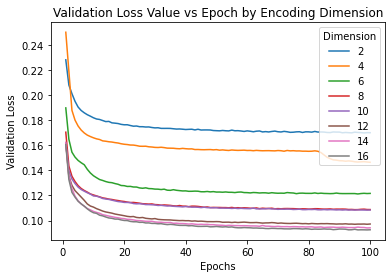

In [184]:
losses = []
dimensions = range(2,18,2)
dimensions_labels = []

for encoding_dim in dimensions:
    
    # this is our input placeholder
    x = input_img = Input(shape=(784,))
    # "encoded" is the encoded representation of the input
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='relu')(x)
    
    # "decoded" is the lossy reconstruction of the input
    x = Dense(128, activation='relu')(encoded)
    x = Dense(256, activation='relu')(x)
    decoded = Dense(784, activation='sigmoid')(x)
    
    # this model maps an input to its reconstruction
    autoencoder = Model(input_img, decoded)
    encoder = Model(input_img, encoded)
    
    # create a placeholder for an encoded (32-dimensional) input
    encoded_input = Input(shape=(encoding_dim,))
    # retrieve the last layer of the autoencoder model
    dcd1 = autoencoder.layers[-1]
    dcd2 = autoencoder.layers[-2]
    dcd3 = autoencoder.layers[-3]
    
    # create the decoder model
    decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))
    
    autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')
    
    history_test = autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest))

    loss = history_test.history["val_loss"]
    losses.append(loss)
    dimensions_label = encoding_dim
    dimensions_labels.append(dimensions_label)
    epoch_num = list(range(1, len(losses[0])+1))

plot_test = plt.figure()

for k in range(len(losses)):
    plt.plot(epoch_num, losses[k], label = dimensions_labels[k])
plt.legend(title = "Dimension", loc = 'upper right')
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss Value vs Epoch by Encoding Dimension")    




2. **_After_** training an autoencoder with `encoding_dim=8`, apply noise (like the previous assignment) to *_only_* the input of the trained autoencoder (not the output). The output images should be without noise. 

Print a few noisy images along with the output images to show they don't have noise.

In [185]:

# this is the size of our encoded representations
encoding_dim = 8  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (8-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))



In [199]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')

In [200]:
autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest))

                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')]

Epoch 1/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1047 - val_loss: 0.1087
Epoch 2/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1045 - val_loss: 0.1088
Epoch 3/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1045 - val_loss: 0.1088
Epoch 4/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1045 - val_loss: 0.1088
Epoch 5/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1044 - val_loss: 0.1087
Epoch 6/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1044 - val_loss: 0.1085
Epoch 7/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1043 - val_loss: 0.1088
Epoch 8/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1043 - val_loss: 0.1089
Epoch 9/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1043 - val_loss: 0.1085
Epoch 10/100
235/235 [==============================] - 3s 12ms/step - loss: 0.104

235/235 [==============================] - 3s 13ms/step - loss: 0.1021 - val_loss: 0.1083
Epoch 81/100
235/235 [==============================] - 3s 15ms/step - loss: 0.1021 - val_loss: 0.1081
Epoch 82/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1021 - val_loss: 0.1081
Epoch 83/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1020 - val_loss: 0.1081
Epoch 84/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1020 - val_loss: 0.1081
Epoch 85/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1020 - val_loss: 0.1083
Epoch 86/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1020 - val_loss: 0.1082
Epoch 87/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1020 - val_loss: 0.1084
Epoch 88/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1020 - val_loss: 0.1080
Epoch 89/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1019 - 

313/313 [==============================] - 0s 1ms/step


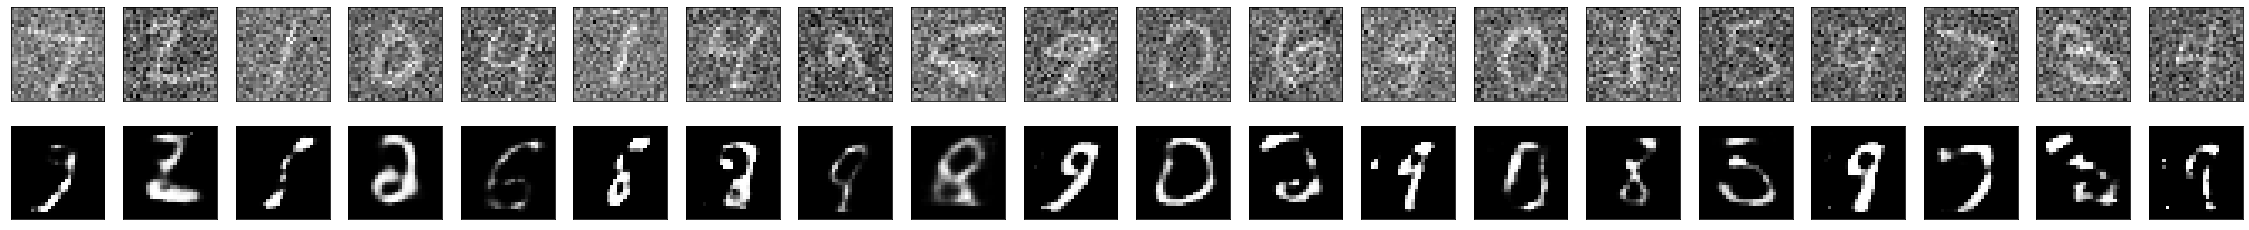

In [213]:
xtest2 = np.random.normal(xtest, scale = .5)

encoded_imgs = encoder.predict(xtest2)
decoded_imgs2 = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt
                          
n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()